In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [95]:
carprice_dataset = pd.read_csv('/content/drive/MyDrive/ML datasets/Car Price Prediction/car data.csv')
carprice_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [96]:
carprice_dataset.shape

(301, 9)

In [97]:
print(carprice_dataset['Fuel_Type'].value_counts())
print(carprice_dataset['Seller_Type'].value_counts())
print(carprice_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [98]:
carprice_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [99]:
 carprice_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Encoding the categorical data

In [100]:
#converting the text datas to numerical values
carprice_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2},
                          'Seller_Type':{'Dealer':0, 'Individual':1},
                          'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [101]:
carprice_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [102]:
x = carprice_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = carprice_dataset['Selling_Price']

In [142]:
print(x.shape)

(301, 7)


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

Model Training: Linear Regression

In [106]:
lin_reg_model = LinearRegression()


In [107]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [139]:
x_train_prediction = lin_reg_model.predict(x_train)

(270,)

In [109]:
#accuracy using R2 score
accuracy = metrics.r2_score(y_train, x_train_prediction)
print(accuracy)

# Here the error score should be as low as possible. This value of r2 error is a bit different from the accuracy score we din in case of the classification model.
# This result is different in dfferent problems and it is hard to tell which r2 score value is better. So, we need to plot and see the values. (Regression plot)

0.8799451660493711


In [110]:
#accuracy using accuracy_score

# accuracy2 = accuracy_score(x_train, y_train)
# print(accuracy2)

#Sooo it doesn't work. I see! because accuracy_score determines the accuracy of the classification. Here, in case of regression we need to use R2 score.

Visualizing the actual prices and predicted prices

In [137]:
x_train.shape

(270, 7)

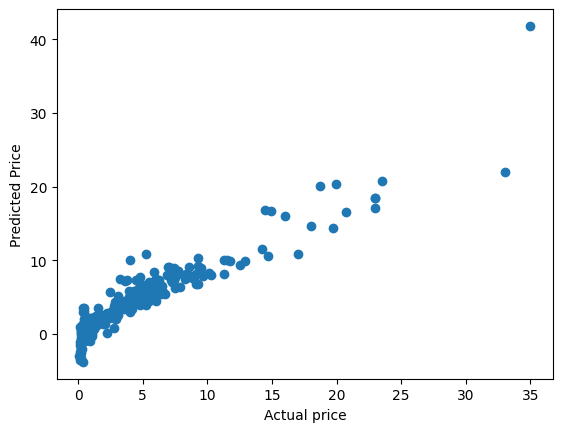

In [111]:
#this is for training data
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.show()

#here we can see that the dots are very close. that means, the values of our predicted price and the actual price are pretty close

In [112]:
#Now for test data
x_test_prediction = lin_reg_model.predict(x_test)

In [113]:
accuracy = metrics.r2_score(y_test, x_test_prediction)
print(accuracy)

0.8365766715027051


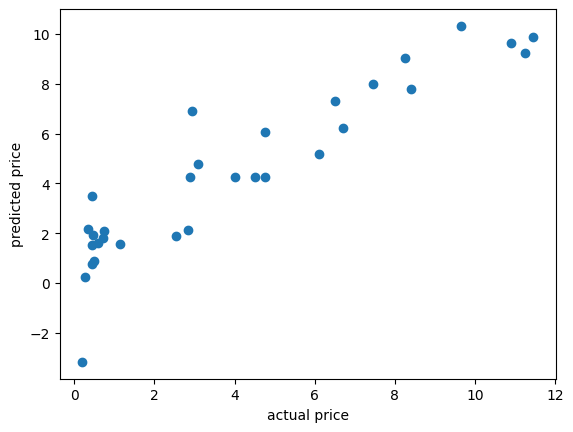

In [114]:
#now visualizing the data in a scatter plot
plt.scatter(y_test, x_test_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

# Here we can see that the dots are almost in the same line. So it is a good model.

Now Lasso Regression model.

Lasso reg works better most of the cases. Lasso regression or xg boost reg works best where there are multiple fearues and multiple columns.

Linear regression works best on positive correlated values where the columns are positively correlated.

In [115]:
lasso_reg_model = Lasso()


In [116]:
lasso_reg_model.fit(x_train, y_train)

Lasso()

In [117]:
x_train_prediction = lasso_reg_model.predict(x_train)

In [118]:
#accuracy using R2 score
accuracy = metrics.r2_score(y_train, x_train_prediction)
print(accuracy)

# Here the error score should be as low as possible. This value of r2 error is a bit different from the accuracy score we din in case of the classification model.
# This result is different in dfferent problems and it is hard to tell which r2 score value is better. So, we need to plot and see the values. (Regression plot)

0.8427856123435794


In [119]:
#accuracy using accuracy_score

# accuracy2 = accuracy_score(x_train, y_train)
# print(accuracy2)

#Sooo it doesn't work. I see! because accuracy_score determines the accuracy of the classification. Here, in case of regression we need to use R2 score.

Visualizing the actual prices and predicted prices

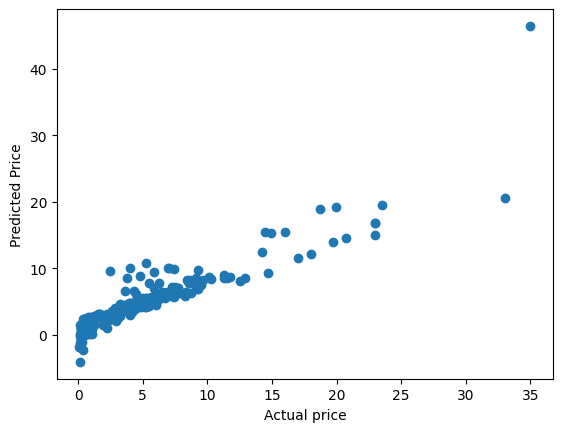

In [120]:
#this is for training data
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.show()

#here we can see that the dots are very close. that means, the values of our predicted price and the actual price are pretty close

In [121]:
#Now for test data
x_test_prediction = lasso_reg_model.predict(x_test)

In [122]:
accuracy = metrics.r2_score(y_test, x_test_prediction)
print(accuracy)

0.8709167941173195


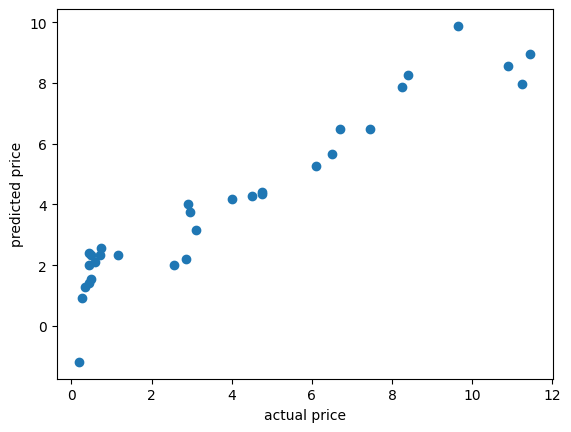

In [123]:
#now visualizing the data in a scatter plot
plt.scatter(y_test, x_test_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

# Here we can see that the dots are almost in the same line. So it is a good model.

Now XG Boost

In [125]:
xgb_reg_model = xgb.XGBRegressor()


In [126]:
xgb_reg_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [127]:
x_train_prediction = xgb_reg_model.predict(x_train)

In [128]:
#accuracy using R2 score
accuracy = metrics.r2_score(y_train, x_train_prediction)
print(accuracy)

# Here the error score should be as low as possible. This value of r2 error is a bit different from the accuracy score we din in case of the classification model.
# This result is different in dfferent problems and it is hard to tell which r2 score value is better. So, we need to plot and see the values. (Regression plot)

0.9999896680984235


In [129]:
#accuracy using accuracy_score

# accuracy2 = accuracy_score(x_train, y_train)
# print(accuracy2)

#Sooo it doesn't work. I see! because accuracy_score determines the accuracy of the classification. Here, in case of regression we need to use R2 score.

Visualizing the actual prices and predicted prices

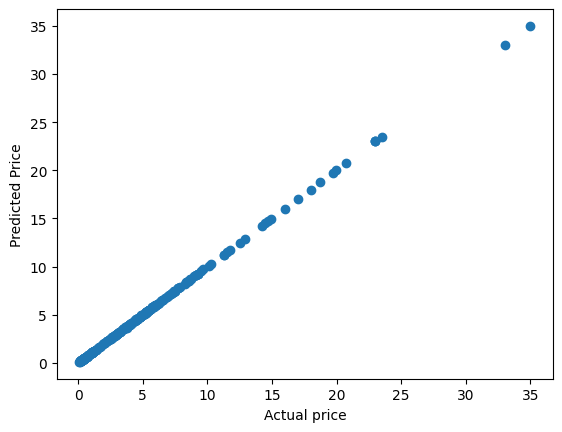

In [130]:
#this is for training data
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.show()

#here we can see that the dots are very close. that means, the values of our predicted price and the actual price are pretty close

In [131]:
#Now for test data
x_test_prediction = xgb_reg_model.predict(x_test)

In [132]:
accuracy = metrics.r2_score(y_test, x_test_prediction)
print(accuracy)

0.9807321370840111


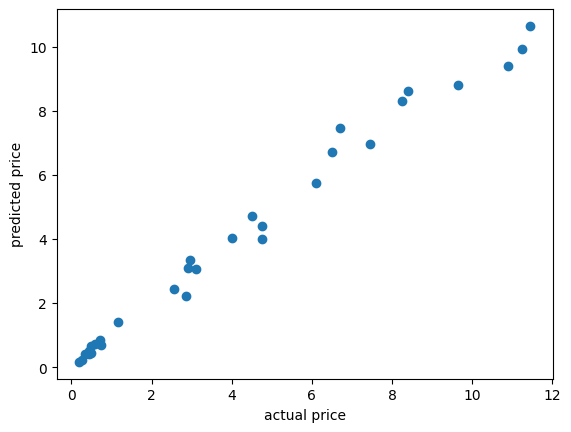

In [133]:
#now visualizing the data in a scatter plot
plt.scatter(y_test, x_test_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

# Here we can see that the dots are almost in the same line. So it is a good model.